## Домашнее задание к занятию №2 от 06.11.2019 г. «Машинные методы в помощь обработке данных»
ФИО: Кривова Татьяна Сергеевна

**1. Взять датасет homework.csv**

In [2]:
import pandas as pd
import pandas_profiling
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
raw_data = pd.read_csv('homework.csv') # raw_data.shape --> (333, 15)

In [4]:
raw_data.info()
raw_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


In [5]:
raw_data.isna().sum() # Количество отсутствующих значений в каждом столбце

# Вывод: отсутствующих значений (Nan элементов) нет.

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [6]:
# Посмотрим основные статистики для атрибутов:
raw_data.describe() 

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [8]:
# Подробный отчет по датасету. Смотрю информацию о целевой метрике medv:
pandas_profiling.ProfileReport(raw_data)

**2. Описание датасета доступно тут: Boston Housing с kaggle.**

Атрибуты:

* **ID**: number(?)
* **crim**: per capita crime rate by town
* **zn**: proportion of residential land zoned for lots over 25,000 sq.ft.
* **indus**: proportion of non-retail business acres per town
* **chas**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **nox**: nitrogen oxides concentration (parts per 10 million)
* **rm**: average number of rooms per dwelling
* **age**: proportion of owner-occupied units built prior to 1940
* **dis**: weighted mean of distances to five Boston employment centres
* **rad**: index of accessibility to radial highways
* **tax**: full-value property-tax rate per 10,000 dollars
* **ptratio**: pupil-teacher ratio by town
* **black**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* **lstat**: lower status of the population (percent)
* **medv (target variable)**: median value of owner-occupied homes in 1000 dollars

**3. Решить задачу регрессии (как минимум один из: LinearRegression, SVR, DecisionTreeRegressor).**

**3.1.** Посмотрим распределения переменных, корреляции, feature_importances и выбросы. Выберем атрибуты для использования в моделях.

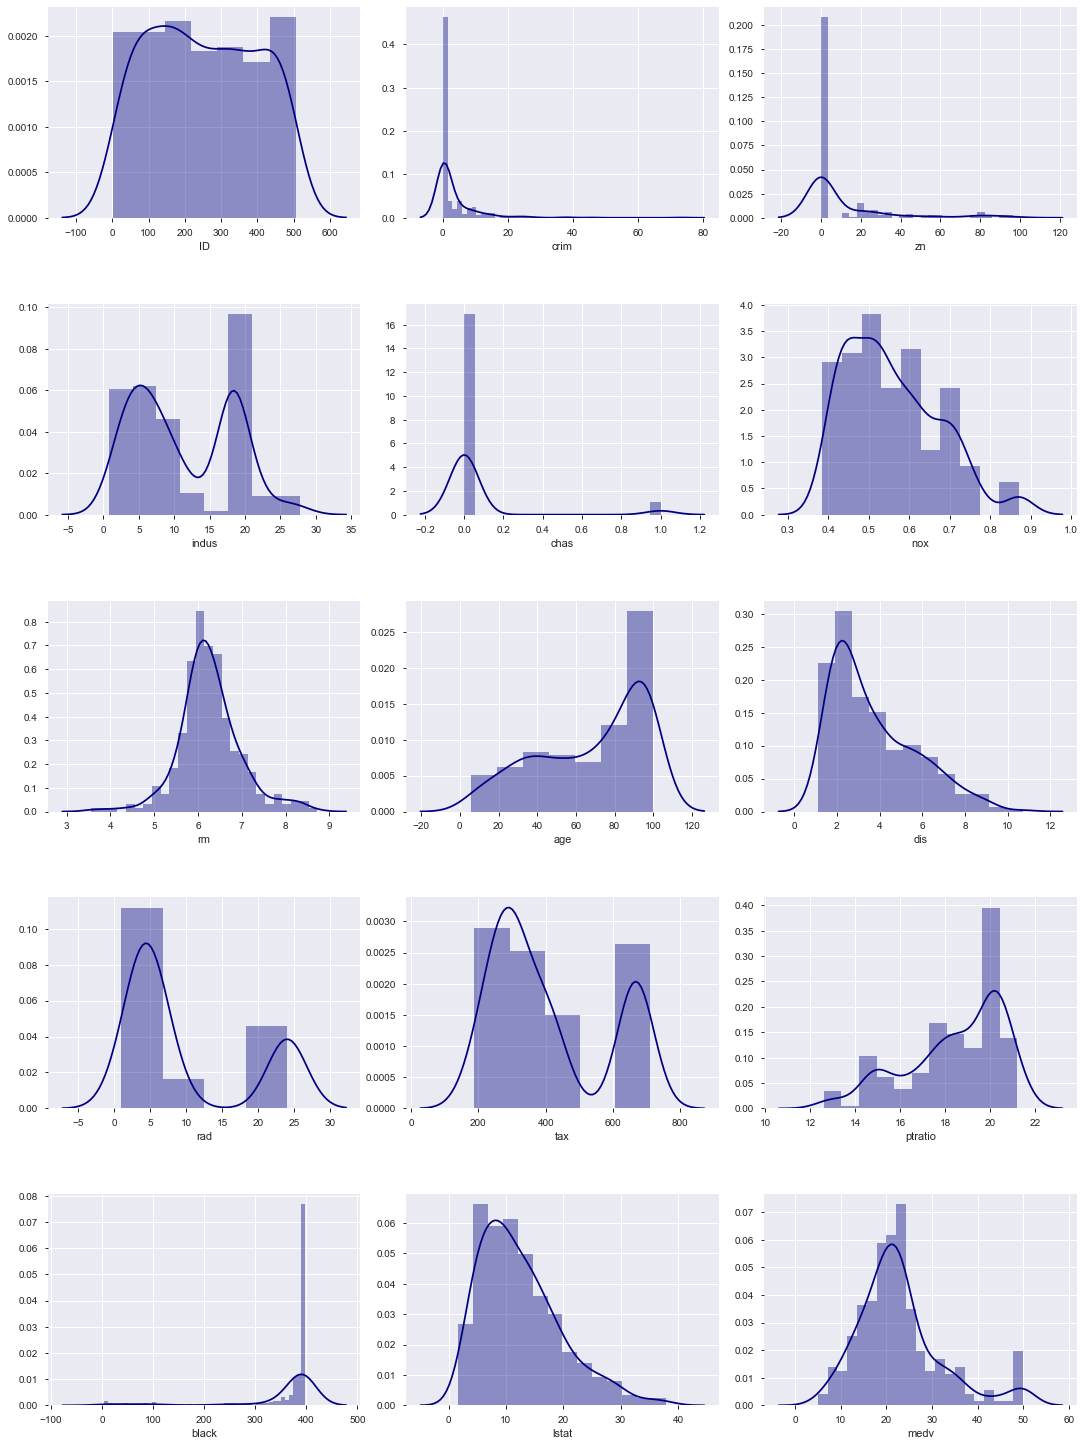

In [12]:
# Частотные графики для всех значений (sns.distplot)

fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(15, 20))
index = 0
axs = axs.flatten()

for k,v in raw_data.items():
    sns.distplot(v, ax=axs[index], color='navy')
    index += 1
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

Выводы: целевая переменная **medv** имеет распределение, визуально близкое к нормальному, возможно, с выбросами - проанализируем их отдельно. 

Атрибут **ID** имеет распределение, визуально близкое к равномерному. Атрибуты **crim, zn, chas, black** имеют сильно перекошенные распределения. Будем это учитывать при отборе признаков для модели (вероятно, их не стОит выбирать).

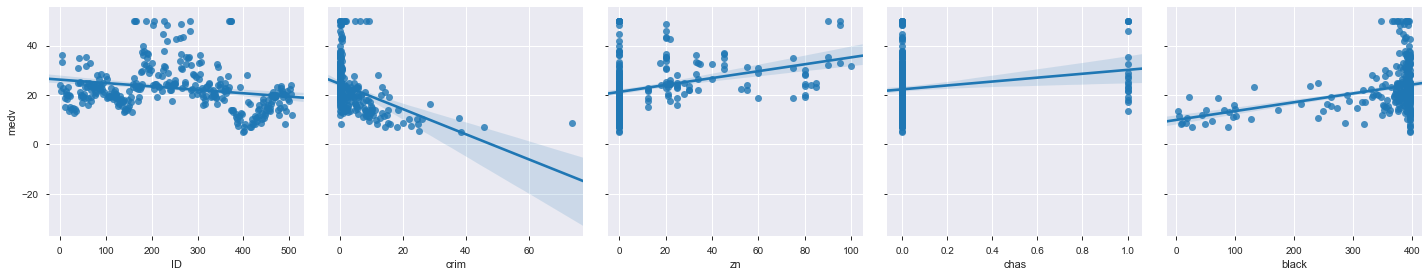

In [26]:
# Посмотрим зависимость целевой переменной medv от этих атрибутов и проверим выводы (sns.pairplot)
sns.pairplot(raw_data,\
             x_vars=["ID", "crim", "zn", "chas", "black"],\
             y_vars=["medv"], kind="reg", height=4)

In [27]:
# Матрица корреляций

correlations = raw_data.corr()
correlations.style.background_gradient(cmap='coolwarm').set_precision(3)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,1,0.456,-0.156,0.422,0.00796,0.44,-0.113,0.257,-0.356,0.708,0.686,0.31,-0.272,0.282,-0.222
crim,0.456,1,-0.211,0.422,-0.0412,0.463,-0.31,0.379,-0.397,0.667,0.617,0.313,-0.476,0.532,-0.407
zn,-0.156,-0.211,1,-0.519,-0.0244,-0.502,0.328,-0.545,0.637,-0.304,-0.311,-0.38,0.168,-0.388,0.345
indus,0.422,0.422,-0.519,1,0.0375,0.75,-0.44,0.638,-0.702,0.57,0.708,0.391,-0.335,0.614,-0.474
chas,0.00796,-0.0412,-0.0244,0.0375,1,0.0803,0.112,0.0683,-0.0818,0.00771,-0.0218,-0.125,0.062,-0.0501,0.204
nox,0.44,0.463,-0.502,0.75,0.0803,1,-0.339,0.736,-0.769,0.612,0.671,0.193,-0.369,0.599,-0.413
rm,-0.113,-0.31,0.328,-0.44,0.112,-0.339,1,-0.249,0.269,-0.273,-0.357,-0.367,0.155,-0.616,0.69
age,0.257,0.379,-0.545,0.638,0.0683,0.736,-0.249,1,-0.764,0.447,0.512,0.259,-0.268,0.589,-0.359
dis,-0.356,-0.397,0.637,-0.702,-0.0818,-0.769,0.269,-0.764,1,-0.478,-0.53,-0.231,0.284,-0.506,0.249
rad,0.708,0.667,-0.304,0.57,0.00771,0.612,-0.273,0.447,-0.478,1,0.904,0.471,-0.406,0.485,-0.352


E:\Python_programming\Tatiana Python2_Specialist_30-07-2019\python-29-07\python\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
E:\Python_programming\Tatiana Python2_Specialist_30-07-2019\python-29-07\python\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


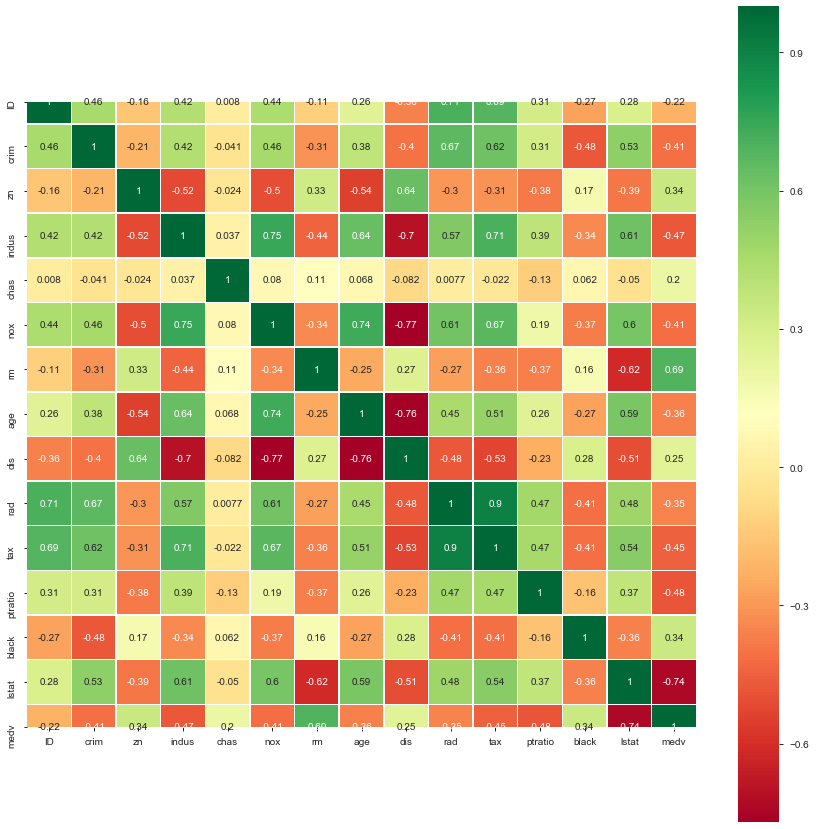

In [29]:
# Матрица корреляции в виде тепловой карты (sns.heatmap)

rcParams['figure.figsize'] = 15,15
sns.heatmap(correlations, annot=True,linewidths=.5, square=True, cmap="RdYlGn")

In [30]:
# Посмотрим, у скольких элементов корреляция с целевой метрикой medv >= 60% 
place = 0
for number in correlations.medv:
    place+=1
    if abs(number) >= 0.6: print(f'Элемент {place}: коэффициент корреляции {round(number,5)}')

Элемент 7: коэффициент корреляции 0.6896
Элемент 14: коэффициент корреляции -0.7386
Элемент 15: коэффициент корреляции 1.0


Из таблицы корреляций обратим внимание на переменные, которые коррелируют (положительно или отрицательно) с искомым значением (medv), корреляция > 60% у двух атрибутов.

lstat имеет отрицательную высокую корреляцию (-0.7386) с medv, вторая величина по корелляции - rm (0.6896).

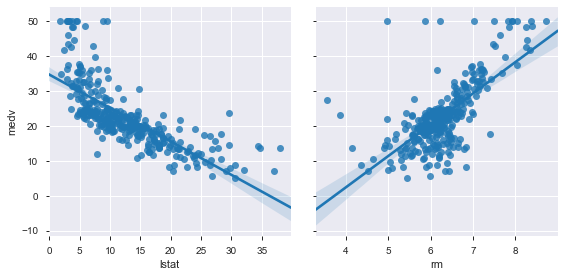

In [31]:
# Посмотрим зависимость целевой переменной medv от этих атрибутов и проверим выводы (sns.pairplot)
sns.pairplot(raw_data,\
             x_vars=["lstat", "rm"],\
             y_vars=["medv"], kind="reg", height=4)

In [32]:
# Найдем элементы, у которых корреляция с целевой метрикой medv >= 45% и < 60%
place = 0
for number in correlations.medv:
    place+=1
    if abs(number) >= 0.45 and abs(number) < 0.6: print(f'Элемент {place}: коэффициент корреляции {round(number,5)}')

Элемент 4: коэффициент корреляции -0.47393
Элемент 12: коэффициент корреляции -0.48138


Следующими по величине абсолютной корелляции идут значения ptratio, indus.

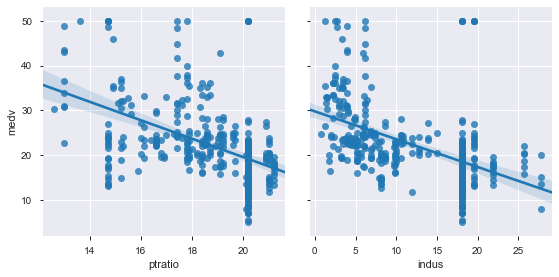

In [34]:
# Посмотрим зависимость целевой переменной medv от этих атрибутов и проверим выводы (sns.pairplot)
sns.pairplot(raw_data,\
             x_vars=["ptratio", "indus"],\
             y_vars=["medv"], kind="reg", height=4)

Вывод: исходя из анализа матрицы корреляций, имеем следующие 4 атрибута-кандидата для построения линейной модели:
lstat, rm, ptratio, indus.

In [35]:
# Посмотрим feature_importances

output_y = raw_data.medv
input_x = raw_data.loc[:, :'lstat']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(input_x, output_y, test_size=0.3, random_state=4)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=True, random_state=6, splitter='best')

Text(0.5, 0, 'Важность атрибутов')

Text(0, 0.5, 'Атрибуты')

Text(0.5, 1.0, 'Наиболее важные атрибуты')

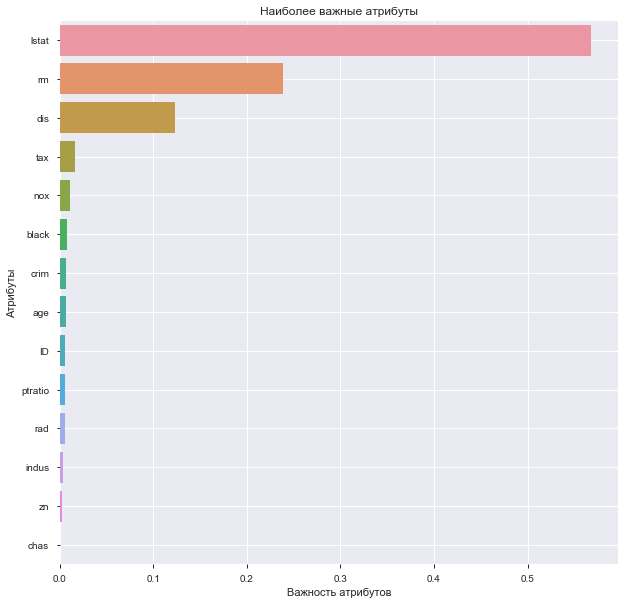

In [38]:
# создаем модель деревья регрессии
rg=DecisionTreeRegressor(max_depth=7, random_state=6, presort=True)

# обучаем модель
rg.fit(X_train,y_train)

headers = list(X_train.columns.values)

feature_imp = pd.Series(rg.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.grid(True)
plt.show()

In [39]:
rg.score(X_train,y_train) # coefficient of determination R^2 of the prediction

0.9789980170945853

Проанализируем топ-5 наиболее важных атрибутов:

**lstat, rm** - уже отобрали по матрице корреляций.
    
**dis** - третий по важности атрибут. Возможно, имеет смысл его рассмотреть в качестве кандидата для модели.  

**tax, nox** - имеют коэффициент корреляции > 70% с indus. При этом indus имеет более высокий коэффициент корреляции с целевой метрикой. Поэтому в качестве кандидата для модели берем indus.

Вывод: исходя из анализа матрицы корреляций и feature_importances, выберем следующие комбинации атрибутов для построения моделей и сравним качество моделей: 

**1) lstat, rm**

**2) lstat, rm, dis**

**3) lstat, rm, ptratio, indus**

**4) lstat, rm, dis, ptratio, indus**

In [40]:
model_data = raw_data[['lstat', 'rm', 'dis', 'ptratio', 'indus', 'medv']]

model_data.shape
model_data.head()

(333, 6)

,lstat,rm,dis,ptratio,indus,medv
0,4.98,6.575,4.0900,15.3,2.31,24.0
1,9.14,6.421,4.9671,17.8,7.07,21.6
2,2.94,6.998,6.0622,18.7,2.18,33.4
3,5.33,7.147,6.0622,18.7,2.18,36.2
4,12.43,6.012,5.5605,15.2,7.87,22.9


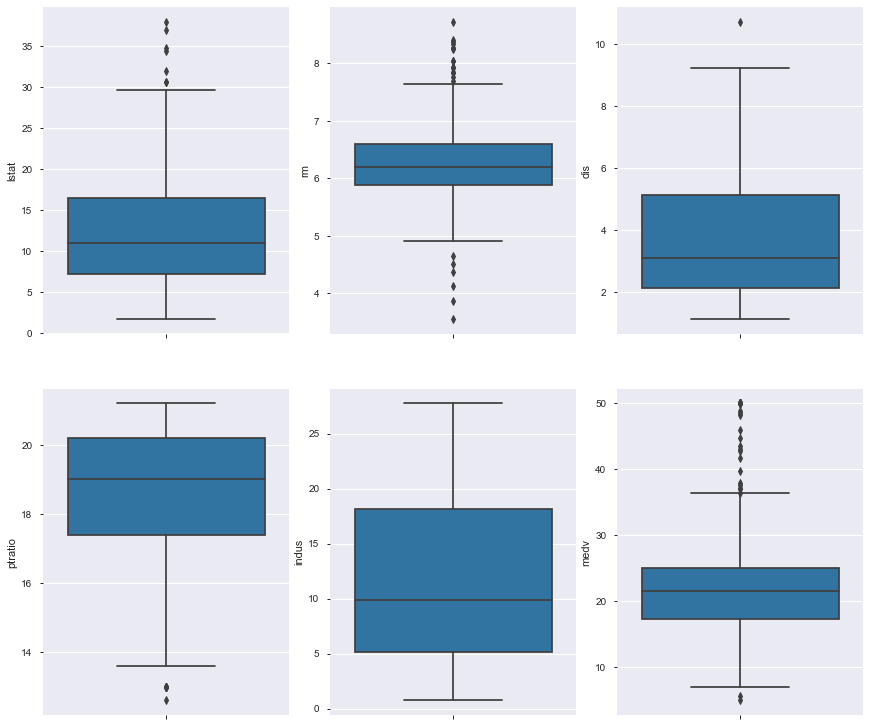

In [41]:
# Посмотрим выбросы для каждой переменной. По графикам boxplot видно, что выбросы есть

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12, 10))
index = 0
axs = axs.flatten()
for k,v in model_data.items():
    sns.boxplot(y=k, data=model_data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [42]:
# Поработаем с выбросами:

model_data_outliers = model_data.describe().loc[['25%','75%'],:]

model_data_outliers.loc['IQ'] = 0 # interquartile range: IQ
model_data_outliers.loc['Q1 - 1.5*IQ'] = 0 # lower inner fence: Q1 - 1.5*IQ
model_data_outliers.loc['Q3 + 1.5*IQ'] = 0 # upper inner fence: Q3 + 1.5*IQ
model_data_outliers.loc['Q1 - 3*IQ'] = 0 # lower outer fence: Q1 - 3*IQ
model_data_outliers.loc['Q3 + 3*IQ'] = 0 # upper outer fence: Q3 + 3*IQ

In [43]:
for col,val in model_data_outliers.items():
    model_data_outliers[col]['IQ'] = val[1]-val[0]
    model_data_outliers[col]['Q1 - 1.5*IQ'] = val[0] - 1.5*(val[1]-val[0])
    model_data_outliers[col]['Q3 + 1.5*IQ'] = val[1] + 1.5*(val[1]-val[0])
    model_data_outliers[col]['Q1 - 3*IQ'] = val[0] - 3*(val[1]-val[0])
    model_data_outliers[col]['Q3 + 3*IQ'] = val[1] + 3*(val[1]-val[0])

In [44]:
model_data_outliers

,lstat,rm,dis,ptratio,indus,medv
25%,7.18,5.8840,2.12240,17.4,5.130,17.4
75%,16.42,6.5950,5.11670,20.2,18.100,25.0
IQ,9.24,0.7110,2.99430,2.8,12.970,7.6
Q1 - 1.5*IQ,-6.68,4.8175,-2.36905,13.2,-14.325,6.0
Q3 + 1.5*IQ,30.28,7.6615,9.60815,24.4,37.555,36.4
Q1 - 3*IQ,-20.54,3.7510,-6.86050,9.0,-33.780,-5.4
Q3 + 3*IQ,44.14,8.7280,14.09960,28.6,57.010,47.8


In [45]:
spisok_extr = []

for col,val in model_data_outliers.items():
    lower = model_data_outliers[col]['Q1 - 3*IQ']
    upper = model_data_outliers[col]['Q3 + 3*IQ']
# Добавляю в список индексы строк с экстремальными выбросами:
    spisok_extr += (list(model_data[model_data[col] < lower].index) + list(model_data[model_data[col] > upper].index))

In [46]:
len(spisok_extr), len(set(spisok_extr)) # общее количество индексов в списке и количество уникальных

# Вывод: имеем 15 строк с экстремальными выбросами

(15, 15)

In [48]:
spisok_ord = []

for col,val in model_data_outliers.items():
    lower = model_data_outliers[col]['Q1 - 1.5*IQ']
    upper = model_data_outliers[col]['Q3 + 1.5*IQ']
# Добавляю в список индексы строк со всеми выбросами:
    spisok_ord += (list(model_data[model_data[col] < lower].index) + list(model_data[model_data[col] > upper].index))

In [49]:
len(spisok_ord), len(set(spisok_ord)) # общее количество индексов в списке и количество уникальных

# Вывод: имеем 44 строки со всеми выбросами

(66, 44)

In [50]:
# Удаляю из датафрейма model_data 44 строки со всеми выбросами
rows_to_drop = list(set(spisok_ord))
model_data.drop(index=rows_to_drop, inplace=True) # model_data.shape --> (289, 6)

E:\Python_programming\Tatiana Python2_Specialist_30-07-2019\python-29-07\python\lib\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Выбросы исключили.

**3.2.** Масштабирование.

In [52]:
model_data.describe() 

,lstat,rm,dis,ptratio,indus,medv
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,12.685952,6.196277,3.819200,18.654671,11.504256,20.966090
std,6.182884,0.467157,1.935286,1.934892,6.921545,6.097993
min,1.980000,4.926000,1.285200,14.700000,0.740000,7.200000
25%,7.730000,5.888000,2.257700,17.400000,5.320000,17.300000
50%,11.690000,6.164000,3.272100,19.100000,9.900000,20.600000
75%,16.590000,6.484000,5.244700,20.200000,18.100000,24.100000
max,29.680000,7.420000,9.222900,21.200000,27.740000,36.400000


In [53]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1)) # Масштабирование
np_scaled = min_max_scaler.fit_transform(model_data)
df_scaled = pd.DataFrame(np_scaled)

df_scaled.columns = ['LSTAT', 'RM', 'DIS', 'PTRATIO', 'INDUS', 'MEDV'] # Столбцы с большой буквы после масштабирования

In [54]:
df_scaled.head()
df_scaled.describe()

,LSTAT,RM,DIS,PTRATIO,INDUS,MEDV
0,0.108303,0.661187,0.353352,0.092308,0.058148,0.575342
1,0.258484,0.599439,0.463850,0.476923,0.234444,0.493151
2,0.034657,0.830794,0.601812,0.615385,0.053333,0.897260
3,0.120939,0.890537,0.601812,0.615385,0.053333,0.993151
4,0.377256,0.435445,0.538607,0.076923,0.264074,0.537671


,LSTAT,RM,DIS,PTRATIO,INDUS,MEDV
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,0.386496,0.509333,0.319236,0.608411,0.398676,0.471441
std,0.223209,0.187312,0.243809,0.297676,0.256354,0.208835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.207581,0.385726,0.122517,0.415385,0.169630,0.345890
50%,0.350542,0.496391,0.250312,0.676923,0.339259,0.458904
75%,0.527437,0.624699,0.498822,0.846154,0.642963,0.578767
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
cor_matrix = df_scaled.corr()
cor_matrix.style.background_gradient(cmap='coolwarm').set_precision(3)

,LSTAT,RM,DIS,PTRATIO,INDUS,MEDV
LSTAT,1,-0.572,-0.571,0.312,0.647,-0.795
RM,-0.572,1,0.339,-0.161,-0.424,0.595
DIS,-0.571,0.339,1,-0.283,-0.744,0.487
PTRATIO,0.312,-0.161,-0.283,1,0.324,-0.437
INDUS,0.647,-0.424,-0.744,0.324,1,-0.608
MEDV,-0.795,0.595,0.487,-0.437,-0.608,1


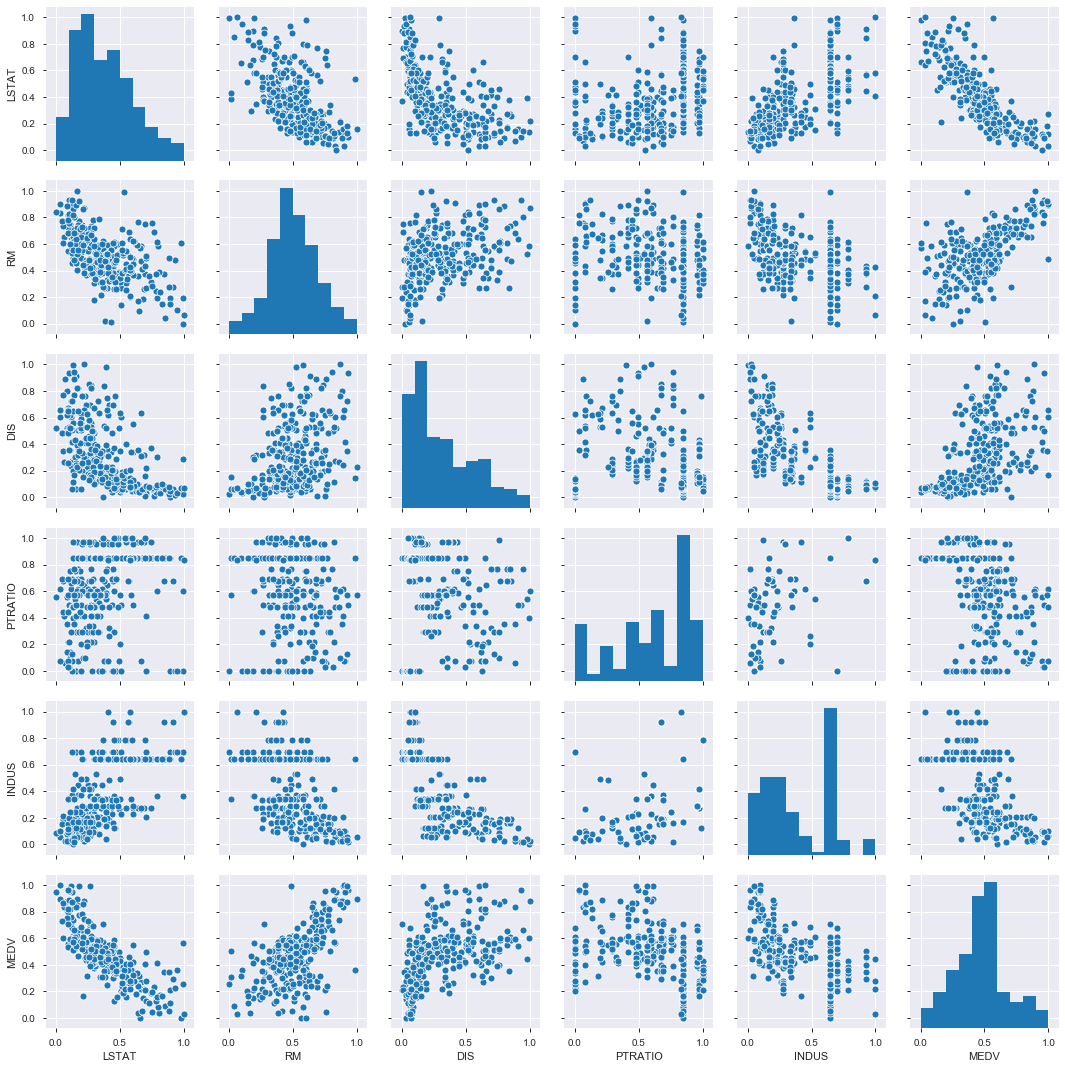

In [56]:
# Посмотрим на атрибуты попарно:
sns.pairplot(df_scaled)

**3.3.** Разделение датасета на тестовую и обучающую выборки.

In [57]:
output_y = df_scaled.MEDV
input_x = df_scaled.loc[:, :'INDUS']

In [58]:
X_train_17, X_test_17, y_train_17, y_test_17 = train_test_split(input_x, output_y, train_size=0.7, random_state=17)

In [59]:
X_train_17.shape, len(y_train_17)

X_test_17.shape, len(y_test_17)

((202, 5), 202)

((87, 5), 87)

**3.2.** LinearRegression

In [69]:
# Датафрейм для результатов
results = pd.DataFrame(columns=['model', 'features', 'train_score', 'r2_score', 'mae', 'mse'])

results.loc[0] = ['LinearRegression', 'LSTAT, RM', 0,0,0,0]
results.loc[1] = ['LinearRegression', 'LSTAT, RM, DIS', 0,0,0,0]
results.loc[2] = ['LinearRegression', 'LSTAT, RM, PTRATIO, INDUS', 0,0,0,0]
results.loc[3] = ['LinearRegression', 'LSTAT, RM, DIS, PTRATIO, INDUS', 0,0,0,0]

In [70]:
# Первая модель - линейная регрессия с двумя признаками (LSTAT, RM).

first_model_1 = LinearRegression().fit(X_train_17[['LSTAT','RM']], y_train_17)

print('intercept:', first_model_1.intercept_)
print('slope:', first_model_1.coef_)

intercept: 0.6060830793390276
slope: [-0.6704294   0.22843227]


In [73]:
results.train_score[0] = first_model_1.score(X_train_17[['LSTAT','RM']], y_train_17) 
# coefficient of determination R^2 of the prediction

In [76]:
first_1_pred = first_model_1.predict(X_test_17[['LSTAT','RM']]) # оцениваем модель LinearRegression

results.r2_score[0] = r2_score(y_test_17, first_1_pred)
results.mae[0] = mean_absolute_error(y_test_17, first_1_pred)
results.mse[0] = mean_squared_error(y_test_17, first_1_pred)

In [78]:
# Линейная регрессия с тремя признаками (LSTAT, RM, DIS).

first_model_2 = LinearRegression().fit(X_train_17[['LSTAT','RM', 'DIS']], y_train_17)

print('intercept:', first_model_2.intercept_)
print('slope:', first_model_2.coef_)

intercept: 0.5797686208587652
slope: [-0.64218951  0.22969324  0.04599794]


In [79]:
results.train_score[1] = first_model_2.score(X_train_17[['LSTAT','RM', 'DIS']], y_train_17) 

In [81]:
first_2_pred = first_model_2.predict(X_test_17[['LSTAT','RM', 'DIS']])

results.r2_score[1] = r2_score(y_test_17, first_2_pred)
results.mae[1] = mean_absolute_error(y_test_17, first_2_pred)
results.mse[1] = mean_squared_error(y_test_17, first_2_pred)

In [83]:
# Линейная регрессия с четырьмя признаками (LSTAT, RM, PTRATIO, INDUS).

first_model_3 = LinearRegression().fit(X_train_17[['LSTAT','RM', 'PTRATIO', 'INDUS']], y_train_17)

print('intercept:', first_model_3.intercept_)
print('slope:', first_model_3.coef_)

intercept: 0.6803814170147306
slope: [-0.52576259  0.22584833 -0.13333405 -0.11473909]


In [84]:
results.train_score[2] = first_model_3.score(X_train_17[['LSTAT','RM', 'PTRATIO', 'INDUS']], y_train_17) 

In [86]:
first_3_pred = first_model_3.predict(X_test_17[['LSTAT','RM', 'PTRATIO', 'INDUS']])

results.r2_score[2] = r2_score(y_test_17, first_3_pred)
results.mae[2] = mean_absolute_error(y_test_17, first_3_pred)
results.mse[2] = mean_squared_error(y_test_17, first_3_pred)

In [88]:
# Линейная регрессия с пятью признаками (LSTAT, RM, DIS, PTRATIO, INDUS).

first_model_4 = LinearRegression().fit(X_train_17, y_train_17)

print('intercept:', first_model_4.intercept_)
print('slope:', first_model_4.coef_)

intercept: 0.7300714272462863
slope: [-0.53846674  0.22031061 -0.07219469 -0.13358112 -0.16158061]


In [89]:
results.train_score[3] = first_model_4.score(X_train_17, y_train_17) 

In [91]:
first_4_pred = first_model_4.predict(X_test_17)

results.r2_score[3] = r2_score(y_test_17, first_4_pred)
results.mae[3] = mean_absolute_error(y_test_17, first_4_pred)
results.mse[3] = mean_squared_error(y_test_17, first_4_pred)

In [92]:
results # Смотрим результаты модели линейной регрессии

,model,features,train_score,r2_score,mae,mse
0,LinearRegression,"LSTAT, RM",0.652169,0.669645,0.091742,0.0133741
1,LinearRegression,"LSTAT, RM, DIS",0.65411,0.668918,0.0925088,0.0134035
2,LinearRegression,"LSTAT, RM, PTRATIO, INDUS",0.698433,0.71836,0.0825929,0.0114019
3,LinearRegression,"LSTAT, RM, DIS, PTRATIO, INDUS",0.7013,0.716278,0.0830672,0.0114862


**3.3.** DecisionTreeRegressor

In [93]:
# Дополним датафрейм для результатов

results.loc[4] = ['DecisionTreeRegressor', 'LSTAT, RM', 0,0,0,0]
results.loc[5] = ['DecisionTreeRegressor', 'LSTAT, RM, DIS', 0,0,0,0]
results.loc[6] = ['DecisionTreeRegressor', 'LSTAT, RM, PTRATIO, INDUS', 0,0,0,0]
results.loc[7] = ['DecisionTreeRegressor', 'LSTAT, RM, DIS, PTRATIO, INDUS', 0,0,0,0]

In [95]:
# Вторая модель - DecisionTreeRegressor с двумя признаками (LSTAT, RM).

second_model_1 = DecisionTreeRegressor(max_depth=7, random_state=9, presort=True).fit(X_train_17[['LSTAT','RM']], y_train_17)

In [96]:
results.train_score[4] = second_model_1.score(X_train_17[['LSTAT','RM']], y_train_17)

In [98]:
second_1_pred = second_model_1.predict(X_test_17[['LSTAT','RM']]) # оцениваем модель DecisionTreeRegressor

results.r2_score[4] = r2_score(y_test_17, second_1_pred)
results.mae[4] = mean_absolute_error(y_test_17, second_1_pred)
results.mse[4] = mean_squared_error(y_test_17, second_1_pred)

In [100]:
# DecisionTreeRegressor с тремя признаками (LSTAT, RM, DIS).

second_model_2 = DecisionTreeRegressor(max_depth=7, random_state=9, presort=True).fit(X_train_17[['LSTAT','RM', 'DIS']], y_train_17)

In [101]:
results.train_score[5] = second_model_2.score(X_train_17[['LSTAT','RM', 'DIS']], y_train_17)

In [103]:
second_2_pred = second_model_2.predict(X_test_17[['LSTAT','RM', 'DIS']])

results.r2_score[5] = r2_score(y_test_17, second_2_pred)
results.mae[5] = mean_absolute_error(y_test_17, second_2_pred)
results.mse[5] = mean_squared_error(y_test_17, second_2_pred)

In [105]:
# DecisionTreeRegressor с четырьмя признаками (LSTAT, RM, PTRATIO, INDUS).

second_model_3 = DecisionTreeRegressor(max_depth=7, random_state=9, presort=True).fit(X_train_17[['LSTAT','RM', 'PTRATIO', 'INDUS']], y_train_17)

In [106]:
results.train_score[6] = second_model_3.score(X_train_17[['LSTAT','RM', 'PTRATIO', 'INDUS']], y_train_17)

In [108]:
second_3_pred = second_model_3.predict(X_test_17[['LSTAT','RM', 'PTRATIO', 'INDUS']])

results.r2_score[6] = r2_score(y_test_17, second_3_pred)
results.mae[6] = mean_absolute_error(y_test_17, second_3_pred)
results.mse[6] = mean_squared_error(y_test_17, second_3_pred)

In [110]:
# DecisionTreeRegressor с пятью признаками (LSTAT, RM, DIS, PTRATIO, INDUS).

second_model_4 = DecisionTreeRegressor(max_depth=7, random_state=9, presort=True).fit(X_train_17, y_train_17)

In [111]:
results.train_score[7] = second_model_4.score(X_train_17, y_train_17)

In [113]:
second_4_pred = second_model_4.predict(X_test_17)

results.r2_score[7] = r2_score(y_test_17, second_4_pred)
results.mae[7] = mean_absolute_error(y_test_17, second_4_pred)
results.mse[7] = mean_squared_error(y_test_17, second_4_pred)

In [114]:
results # Смотрим результаты модели линейной регрессии и DecisionTreeRegressor

,model,features,train_score,r2_score,mae,mse
0,LinearRegression,"LSTAT, RM",0.652169,0.669645,0.091742,0.0133741
1,LinearRegression,"LSTAT, RM, DIS",0.65411,0.668918,0.0925088,0.0134035
2,LinearRegression,"LSTAT, RM, PTRATIO, INDUS",0.698433,0.71836,0.0825929,0.0114019
3,LinearRegression,"LSTAT, RM, DIS, PTRATIO, INDUS",0.7013,0.716278,0.0830672,0.0114862
4,DecisionTreeRegressor,"LSTAT, RM",0.909004,0.485138,0.109912,0.0208437
5,DecisionTreeRegressor,"LSTAT, RM, DIS",0.936866,0.421375,0.12018,0.0234251
6,DecisionTreeRegressor,"LSTAT, RM, PTRATIO, INDUS",0.955355,0.553347,0.101027,0.0180823
7,DecisionTreeRegressor,"LSTAT, RM, DIS, PTRATIO, INDUS",0.962849,0.531584,0.10883,0.0189634


**4. Оценить качество регрессии при помощи метрик.**

In [116]:
# Наилучшая модель исходя из рассчитанных метрик:
results.loc[2,:]

# Вывод: учитывая что среднее значение нормированной целевой метрики 0.471441 (получилась ошибка около 17,5%)

model                   LinearRegression
features       LSTAT, RM, PTRATIO, INDUS
train_score                     0.698433
r2_score                         0.71836
mae                            0.0825929
mse                            0.0114019
Name: 2, dtype: object

In [128]:
# Посмотрим предсказание модели для элементов из таблицы с выбранными индексами и сравним с табличным значением

index_list = [19, 68, 69, 81, 111, 122, 125, 130, 139, 143, 154, 203, 236, 241, 258, 278, 280]

controls = df_scaled[df_scaled.index.isin(index_list)][['LSTAT','RM', 'PTRATIO', 'INDUS', 'MEDV']]

controls['predict_values'] = first_model_3.predict(np.vstack([np.array(controls.LSTAT), np.array(controls.RM), np.array(controls.PTRATIO), np.array(controls.INDUS)]).T)

controls['model_error_abs'] = abs(round(controls['predict_values'] - controls['MEDV'], 3))
controls

,LSTAT,RM,PTRATIO,INDUS,MEDV,predict_values,model_error_abs
19,0.399278,0.459503,0.969231,0.274074,0.250000,0.413555,0.164
68,0.205415,0.743785,0.953846,0.289630,0.660959,0.579952,0.081
69,0.312274,0.593023,0.953846,0.289630,0.390411,0.489721,0.099
81,0.447292,0.378508,0.676923,0.922593,0.506849,0.334583,0.172
111,0.337184,0.591820,0.000000,0.697778,0.517123,0.556702,0.040
122,0.133574,0.656375,0.476923,0.063704,0.866438,0.687495,0.179
125,0.097834,0.726945,0.076923,0.100000,0.797945,0.771393,0.027
130,0.196751,0.495589,0.000000,0.047778,0.578767,0.683383,0.105
139,0.287004,0.783079,0.415385,0.202222,0.695205,0.627755,0.067
143,0.349097,0.423015,0.415385,0.202222,0.585616,0.513789,0.072


Text(0.5, 1.0, 'Точечный график зависимости двух выборок predict_values и MEDV (plt.scatter) для модели LinearRegression с 4 фичами')

Text(0.5, 0, 'predict_values')

Text(0, 0.5, 'MEDV')

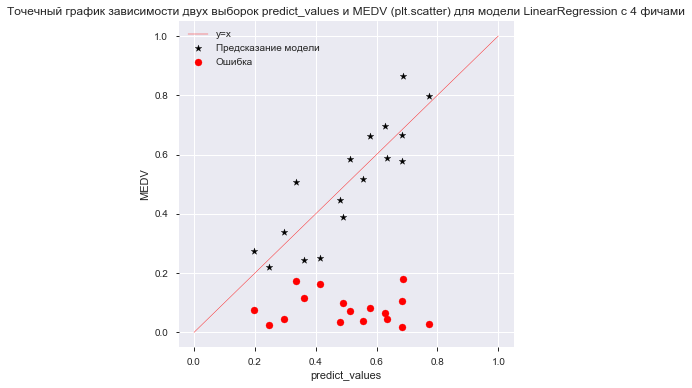

In [133]:
rcParams['figure.figsize'] = 6,6
plt.scatter(controls['predict_values'], controls['MEDV'], color="black", marker="*", label='Предсказание модели')
plt.scatter(controls['predict_values'], controls['model_error_abs'], color="red", marker="o", label='Ошибка')

x = [0, 1]
y = [0, 1]

plt.plot(x, y, color="red", linewidth=0.4, label='y=x')

plt.title('Точечный график зависимости двух выборок predict_values и MEDV (plt.scatter) для модели LinearRegression с 4 фичами')
plt.xlabel('predict_values')
plt.ylabel('MEDV')
plt.grid(True)
plt.legend()